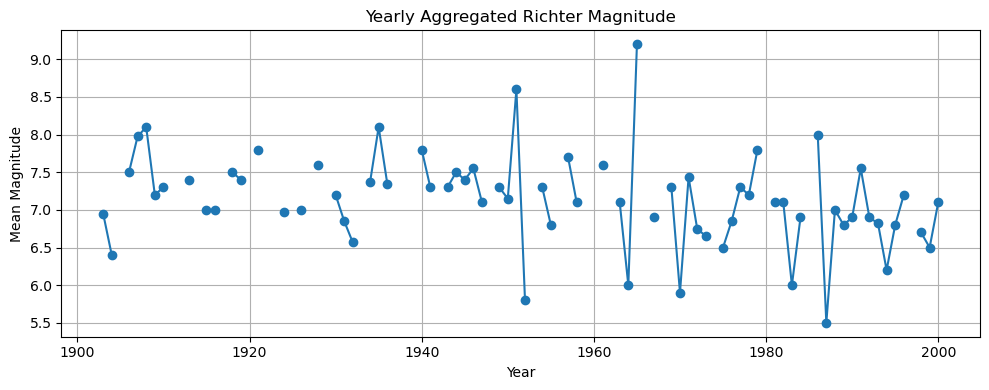

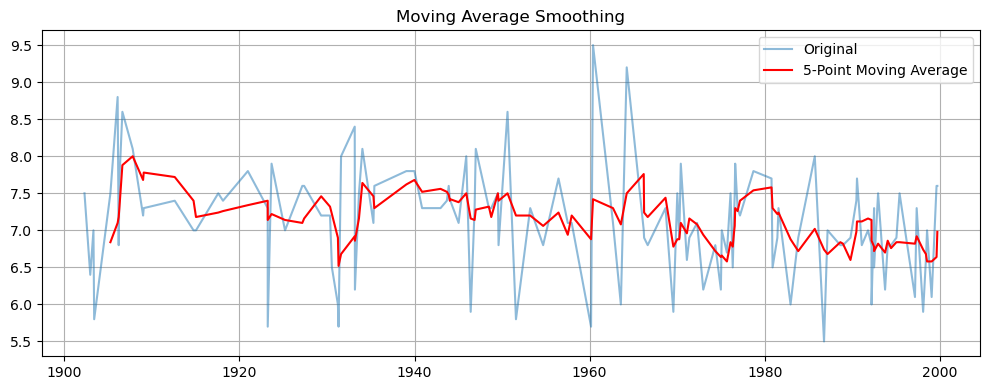

C:\Users\jenit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


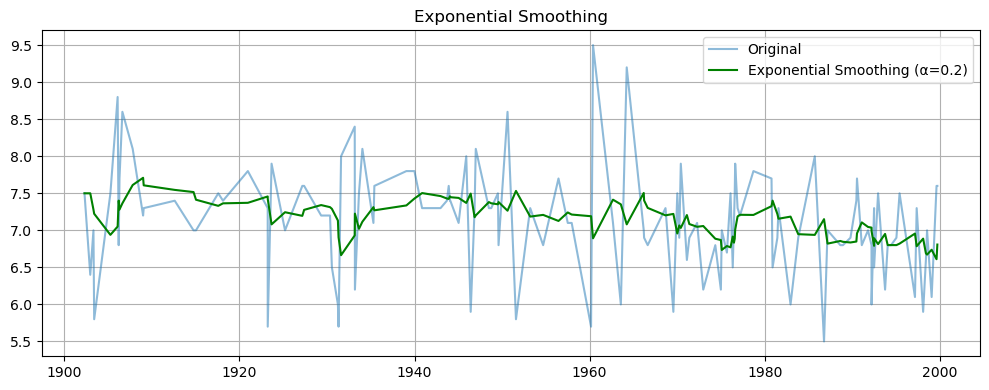

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing

# Load and preprocess dataset
df = pd.read_csv('earthquakes.csv')
df['month'] = pd.to_datetime(df['month'], format='%B').dt.month
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)
richter_series = df['richter'].dropna()

# ========== 1. AGGREGATION: Yearly Average ==========
richter_annual = richter_series.resample('Y').mean()

plt.figure(figsize=(10, 4))
plt.plot(richter_annual, marker='o')
plt.title('Yearly Aggregated Richter Magnitude')
plt.ylabel('Mean Magnitude')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== 2. SMOOTHING: Moving Average ==========
window = 5  # e.g., 5-point moving average
moving_avg = richter_series.rolling(window=window).mean()

plt.figure(figsize=(10, 4))
plt.plot(richter_series, label='Original', alpha=0.5)
plt.plot(moving_avg, label=f'{window}-Point Moving Average', color='red')
plt.title('Moving Average Smoothing')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== 3. SMOOTHING: Exponential Smoothing ==========
exp_smooth = SimpleExpSmoothing(richter_series).fit(smoothing_level=0.2, optimized=False)
smoothed_series = exp_smooth.fittedvalues

plt.figure(figsize=(10, 4))
plt.plot(richter_series, label='Original', alpha=0.5)
plt.plot(smoothed_series, label='Exponential Smoothing (α=0.2)', color='green')
plt.title('Exponential Smoothing')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
